<a href="https://colab.research.google.com/github/Mariusz-cpu/options-valuation/blob/master/ROC_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
import io
df2 = pd.read_csv(io.BytesIO(uploaded['sample_data CRM — kopia.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving sample_data CRM — kopia.csv to sample_data CRM — kopia.csv


In [3]:
import pandas as pd
import numpy as np
mydata = pd.read_csv('sample_data CRM — kopia.csv',delimiter = ';')
mydata_array = np.asarray(mydata)


print(mydata_array[:,0])
print(mydata_array[:,1])


[1. 0. 0. ... 1. 0. 0.]
[0.2   0.09  0.2   ... 0.25  0.06  0.025]


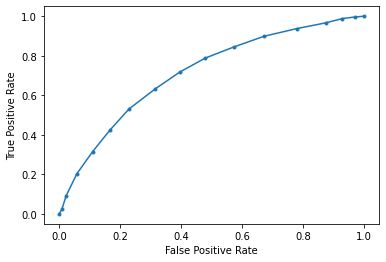

AUC = 0.7135353619102893


In [7]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score

y = np.array(mydata_array[:,0])
scores = np.array(mydata_array[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the plot
plt.show()
print('AUC =',roc_auc_score(y, scores))

In [19]:
from sklearn.utils import resample
import time

n = 100000
Z = np.zeros(n)

#Bootstraping to confirm calculation according to the
for i in range(n):
  Su = resample(mydata_array)
  y_true = np.array(Su[:,0])
  y_scores = np.array(Su[:,1])
  Z[i] = roc_auc_score(y_true, y_scores)
  
print('Standard deviation =',st.stdev(Z))


Standard deviation = 0.01096755287927139


In [8]:
import numpy as np
import statistics as st
import math as mt

defaults = np.delete(mydata_array, np.where(mydata_array == 1), 0)
ndefaults = np.delete(mydata_array, np.where(mydata_array == 0), 0)

Z = [[1,0.2]]
ndefaults=np.concatenate((ndefaults,Z))

D = len(defaults)
ND = len(ndefaults)

P = np.zeros((D, ND))

for nd in range(ND):
  for d in range(D): 
    if defaults[d,1] < ndefaults[nd,1]: 
      P[d,nd] = 1

    elif defaults[d,1] == ndefaults[nd,1]: 
        P[d,nd] = 0.5

    elif defaults[d,1] > ndefaults[nd,1]: 
        P[d,nd] = 0

AUC = np.sum(P)/((D)*(ND))

print('AUC =',AUC)

V0 = np.zeros((ND))
V1 = np.zeros((D))

for nd in range(ND):
  V0[nd] = np.sum(P[:,nd])/(D)
for d in range(D):
  V1[d] = np.sum(P[d,:])/(ND)

SVariance = mt.sqrt(st.pvariance(V0)/ND + st.pvariance(V1)/D)
print('Standard deviation =',SVariance)



AUC = 0.7135353619102893
Standard deviation = 0.010956294443053101
